In [1]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import matplotlib as mlp
from matplotlib import rcParams
import itertools
import matplotlib.font_manager

In [2]:
# 플랏 기본 세팅

# 센치미터를 인치로 변환하는 함수
def cm2in(value):
    return value/2.54

def kilo(value):
    return value/1000

def Mega(value):
    return value/1000000

# 폰트 크기 변수 
FS = 8
LEG_FS = FS-1

# 글씨 두께 변수 0.25 간격
LW = np.arange(0, 3.0, 0.25)

# 라인 스타일
DOTTED1 = (1, 1.25)
DASHDOTTED1 = (2.5, 1.25, 1.25, 1.25)
SUBPLOT_NO = list(map(chr, range(97, 123)))


loosely_dotted = (0, (1, 10))
dotted = (0, (1, 1))
densely_dotted = (0, (1, 1))
long_dash_with_offset = 5, (10, 3)
loosely_dashed = (0, (5, 10))
dashed = (0, (5, 5))
densely_dashed = (0, (5, 1))
loosely_dashdotted = (0, (3, 10, 1, 10))
dashdotted = (0, (3, 5, 1, 5))
densely_dashdotted = (0, (3, 1, 1, 1))
dashdotdotted = (0, (3, 5, 1, 5, 1, 5))
loosely_dashdotdotted = (0, (3, 10, 1, 10, 1, 10))
densely_dashdotdotted = (0, (3, 1, 1, 1, 1, 1))

def D2K(val): 
    return val + 273.15 
def K2D(val):
    return val - 273.15

# 기본인 폰트, 플랏 선 설정

PLT_RC_PARAMS = {
    "font": {
        "size": 8,
        # "family": "sans-serif",
        "family": "Calibri",
    },
    "pdf": {
        "fonttype": 42,
    },
    "lines": {
        "dotted_pattern": [1.0, 1.25],
        "dashed_pattern": [0.7, 9],     # only for grid line
        # "dashed_pattern": [3, 1.5],     # for data line 
        "dashdot_pattern": [1, 1.25, 4, 1.25],
    },
    "legend": {
        "columnspacing": 0.75,
        "labelspacing": 0.4,
        "numpoints": 1,         # legend number of markers
        "borderaxespad": 0.4,   # axes 틀로부터 legend 경계까지 거리 
        "handletextpad": 0.3,   # 선과 선이름 사이의 간격 
        "fancybox": False,
        
    },
    "axes": {
        "linewidth": 0.5 
    },
    "xtick": {
        "major": {
            "width": 0.5,
            "size": 2.0,
        },
        "minor": {
            "width": 0.25,
            "size": 1.0,
        },
        "direction": "in",
    },
    "ytick": {
        "major": {
            "width": 0.5,
            "size": 2.0,
        },
        "minor": {
            "width": 0.25,
            "size": 1.0,
        },
        "direction": "in",
    },
    "figure": {
        "dpi": 300
    },
    
    # Other parameters...
}

# CSV

In [3]:
# csv 파일
df_exergy_c_data = pd.read_csv('../data/df_exergy_c.csv')
df_exergy_OB = pd.read_csv('../data_BL/exergy_EXBL.csv')
df_exergy_IB  = pd.read_csv('../data_BL/exergy_IB.csv')

sun_OB = df_exergy_OB.loc[:, "exergy_c_sun"]
rad_OB = df_exergy_OB.loc[:, "exergy_c_rad"]
rad_IB = df_exergy_IB.loc[:, "exergy_c_IB_rad"]
df_BL = pd.concat([sun_OB, rad_OB, rad_IB], axis=1)

# Time step

In [4]:
# time step, 시간 축 설정
t = 600
hour_to_sec = 3600
time_list = [t*i/hour_to_sec for i in range(len(df_exergy_c_data.iloc[:,[0]]))]
duration = len((df_exergy_c_data.iloc[:,[0]]))*t/hour_to_sec

summer_start_day = 5040 # 7월 30일
summer_end_day = 5088

winter_start_day = 144 # 1월 7일
winter_end_day = 192

24*3600/600

144.0

In [5]:
df_BL_int_winter = df_BL.iloc[int(winter_start_day*hour_to_sec/t):int(winter_end_day*hour_to_sec/t)]

total_exergy_c_BL_winter = df_BL_int_winter.sum().to_frame().transpose()
total_exergy_c_BL_winter = kilo(total_exergy_c_BL_winter )*t

df_int_winter = df_exergy_c_data.iloc[int(winter_start_day*hour_to_sec/t):int(winter_end_day*hour_to_sec/t)]
df_total_exergy_c_data_winter = df_int_winter.sum(axis=1).to_frame()
df_total_exergy_c_data_winter = df_total_exergy_c_data_winter.sum().to_frame()
df_total_exergy_c_data_winter = kilo(df_total_exergy_c_data_winter)*t

df__winter = pd.concat([total_exergy_c_BL_winter, df_total_exergy_c_data_winter], axis=1)
df__winter = df__winter.iloc[:, [0, 1, 3, 2]]

df_BL_int_summer = df_BL.iloc[int(summer_start_day*hour_to_sec/t):int(summer_end_day*hour_to_sec/t)]

total_exergy_c_BL_summer = df_BL_int_summer.sum().to_frame().transpose()
total_exergy_c_BL_summer = kilo(total_exergy_c_BL_summer)*t

df_int_summer = df_exergy_c_data.iloc[int(summer_start_day*hour_to_sec/t):int(summer_end_day*hour_to_sec/t)]
df_total_exergy_c_data_summer = df_int_summer.sum(axis=1).to_frame()
df_total_exergy_c_data_summer = df_total_exergy_c_data_summer.sum().to_frame()
df_total_exergy_c_data_summer = kilo(df_total_exergy_c_data_summer)*t

df__summer = pd.concat([total_exergy_c_BL_summer, df_total_exergy_c_data_summer], axis=1)
df__summer = df__summer.iloc[:, [0, 1, 3, 2]]

# Total eXergy consumption

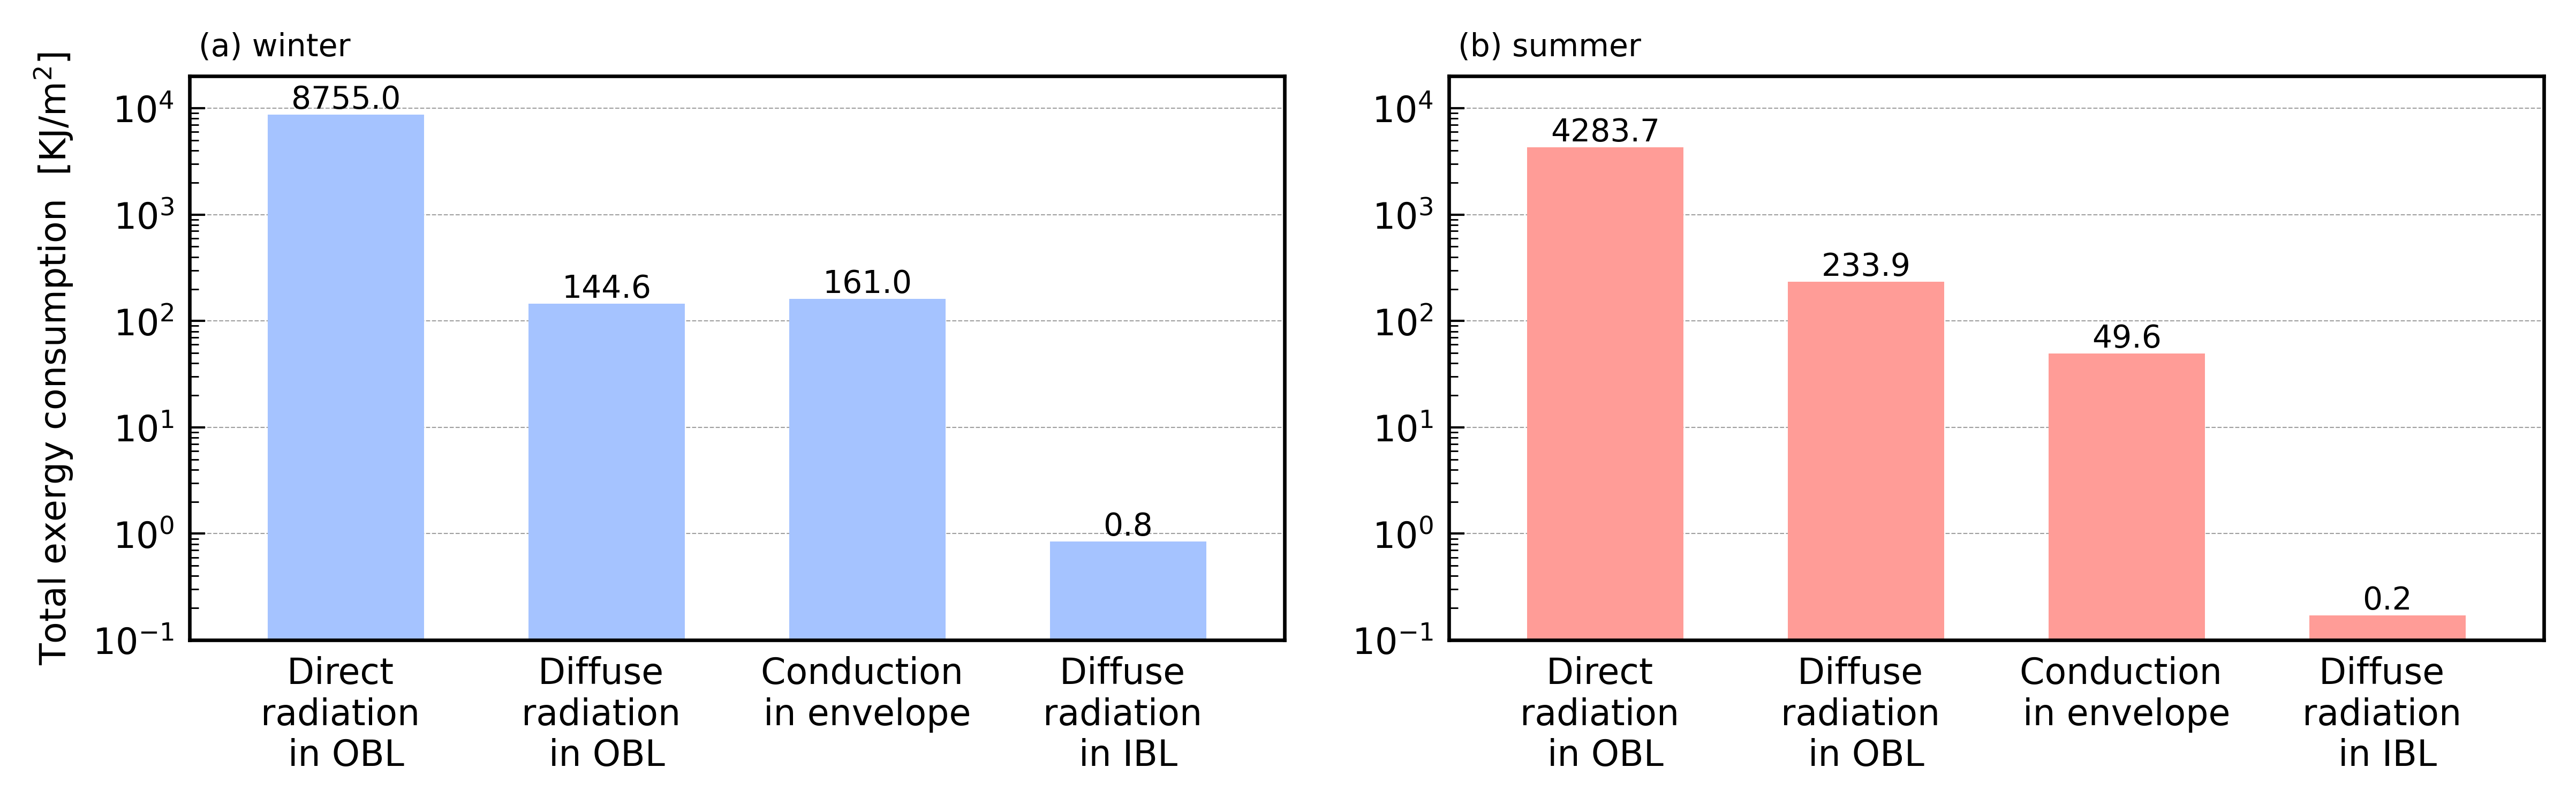

In [7]:
from cProfile import label
    
N = 4 # 노드 개수 (플랏 몇 번 그릴 건지)

nrows = 1
ncols = 2
nfigs = nrows*ncols

fig, ax = plt.subplots(
    nrows, ncols, 
    sharex=False, sharey=False, 
    figsize=(cm2in(20),cm2in(6)), 
    facecolor='w', edgecolor='k',
    squeeze=False,
    dpi=600,
)
X = ("Direct \nradiation \nin OBL", "Diffuse \nradiation \nin OBL", "Conduction \nin envelope", "Diffuse \nradiation \nin IBL")
x_pos = np.arange(len(X))
width= 0.6
Annotation = ["(a) winter", "(b) summer"]
color = [['#A5C3FF'], ['#FF9C97']]

# tick settings

ymin = [0]*nfigs
ymax = [100000]*nfigs
yint = [100]*nfigs
ymar = [0]*nfigs

ylabel = ["Total exergy consumption $~\mathrm{[KJ/m^2]}$", ""]

# 플랏 그리기
for ridx in range(nrows):
    for cidx in range(ncols): 
        for i in range(N):  
        # figure index 
            idx = ncols*ridx + cidx
            if idx == 0:
                plot_y= df__winter
            elif idx == 1:
                plot_y= df__summer
        
            ax[ridx, cidx].bar(
                (x_pos[i]),
                plot_y.iloc[0, [i]],
                width= width,
                color = color[idx],
                align='center'
                )
            
            ax[ridx, cidx].text(
                x_pos[i],
                plot_y.iloc[0, i],
                f'{plot_y.iloc[0, i]:.1f}',
                ha='center',
                va='bottom',
                fontsize=FS-1
            
            )

        # # 라벨 설정
        ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS)
        
        # 축 눈금 및 라벨 크기 설정
        ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='major', width=0.5)
        ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='minor', width=0.35)
        ax[ridx,cidx].tick_params(axis='x', which='both', bottom=False, top=False)
        
        # 축 위치 설정
        
        ax[ridx, cidx].set_xticks(x_pos) 
        ax[ridx,cidx].set_yticks([1, 10, 100, 1000, 10000])
        ax[ridx, cidx].set_xticklabels(X)
        
        # x,y 값 제한
        ax[ridx,cidx].set_yscale('log')
        ax[ridx, cidx].set_xlim(x_pos[0] - width, x_pos[-1] + width)
        ax[ridx, cidx].set_ylim(1/10, 10000 + 10000)
        ax[ridx,cidx].margins(x=0, y=0.1)
        
        
        # 그리드 설정 
        ax[ridx,cidx].grid(True, axis='y', linestyle='--', linewidth=LW[1], color='0.25', alpha = 0.5)
        ax[ridx,cidx].set_axisbelow(True)
        
        # legend 
        handles, labels = ax[ridx,cidx].get_legend_handles_labels()
        legorder1 = range(len(handles))
        ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                            [labels[idx] for idx in legorder1], 
                            loc='upper right', ncol=2, bbox_to_anchor=(0.99, 0.99), frameon=False, 
                            edgecolor='None', facecolor='None',
                            fontsize=7, fancybox=False, 
                            columnspacing= 1.05, labelspacing=0.8,
                            handlelength= 4)
    
        
        # Annotation
        ax[ridx,cidx].annotate(Annotation[idx], xy=(0, 1), xytext=(2, 10), va='top', xycoords='axes fraction', textcoords='offset points',fontsize=7)
        
        # 그래프 외곽 라인 설정     
        for k in ['top','bottom','left','right']:
                ax[ridx,cidx].spines[k].set_visible(True)
                ax[ridx,cidx].spines[k].set_linewidth(0.8)
                ax[ridx,cidx].spines[k].set_color('k') 
                
# Margin adjustment.
fig.align_labels()
fig.tight_layout(pad=0.2, h_pad=0.2)
plt.subplots_adjust(hspace=0.35, wspace=0.15) 

plt.savefig('../data/total_exergy_c_BL.svg', format='svg')
